<a href="https://colab.research.google.com/github/plaban1981/Deep-Learning-KERAS/blob/master/Age_prediction_from_images_using_Tensorflow_Transfer_Learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Drive on Colab as the images are stored in the drive

In [1]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [7]:
import shutil
shutil.move("")

Error: ignored

## Data Preprocessing - eye images

In [76]:
import pandas as pd
import os
train = pd.read_csv("/content/train (6).csv",usecols=['filename','age'])
train.shape

(6872, 2)

In [6]:
age_dict = train.age.value_counts().to_dict()

In [10]:
age_less = [k for k,v in age_dict.items() if v < 10]

In [11]:
age_less

[100, 31, 116, 110, 115, 105, 101]

In [14]:
filename = train[train['age'].isin(age_less)]['filename']

In [17]:
filename_df = train[train['age'].isin(age_less)]
filename_df

,filename,age
226,226.jpg,31
1116,1116.jpg,100
1244,1244.jpg,100
1408,1408.jpg,110
2049,2049.jpg,116
3100,3100.jpg,115
3890,3890.jpg,100
4403,4403.jpg,105
4518,4518.jpg,101
4723,4723.jpg,100


In [76]:
name_lbl_dict = {}
for x,y in filename_df.values:
  print(x,y)
  name_lbl_dict[x.split(".")[0]] = y

226.jpg 31
1116.jpg 100
1244.jpg 100
1408.jpg 110
2049.jpg 116
3100.jpg 115
3890.jpg 100
4403.jpg 105
4518.jpg 101
4723.jpg 100
5407.jpg 116
5943.jpg 31
6198.jpg 100
6251.jpg 100


In [77]:
name_lbl_dict

{'226': 31,
 '1116': 100,
 '1244': 100,
 '1408': 110,
 '2049': 116,
 '3100': 115,
 '3890': 100,
 '4403': 105,
 '4518': 101,
 '4723': 100,
 '5407': 116,
 '5943': 31,
 '6198': 100,
 '6251': 100}

In [15]:
filename

226      226.jpg
1116    1116.jpg
1244    1244.jpg
1408    1408.jpg
2049    2049.jpg
3100    3100.jpg
3890    3890.jpg
4403    4403.jpg
4518    4518.jpg
4723    4723.jpg
5407    5407.jpg
5943    5943.jpg
6198    6198.jpg
6251    6251.jpg
Name: filename, dtype: object

In [65]:
!mkdir augmented_data

In [66]:
import os
# Load the required packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
#Let's define the input dir path & Output dir path where generated image will store
#
fil = []
lbl = []
#
src_path = "/content/drive/MyDrive/Qualcom/train"
des_path = "/content/augmented_data"
def data_augmentation(src_path,des_path,x,y):
  # Let's load input image
  image = load_img(src_path)
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)

  # Let's define ImageDataGenerator class
  aug = ImageDataGenerator(
          rotation_range=30,
          zoom_range=0.15,
          width_shift_range=0.2,
          height_shift_range=0.2,
          shear_range=0.15,
          horizontal_flip=True,
          fill_mode="nearest")
  name_prefix = "image_" + x.split(".")[0]
  # Let's apply ImageDataGenerator to input image
  imageGen = aug.flow(image, batch_size=1, save_to_dir=des_path,save_prefix=name_prefix, save_format="png")

  # Define number of augmented image which you want to download and iterate through loop
  total_image = 25
  i = 0
  for e in imageGen:
    lbl.append(y)
    if (i == total_image):
        break
    i = i +1

In [67]:
import os
for x,y in filename_df.values:
  src_path = os.path.join("/content/drive/MyDrive/Qualcom/train",x)
  data_augmentation(src_path,des_path,x,y)

In [68]:
len(lbl),len(fil)

(364, 0)

In [69]:
import glob
len(glob.glob("/content/augmented_data/*"))

364

In [82]:
fil = []
lbl = []
for file in os.listdir("/content/augmented_data"):
  fil.append(file)
  lbl.append(name_lbl_dict[file.split("_")[1]])

In [79]:
name_lbl_dict['6198']

100

In [83]:
augmented_df = pd.DataFrame({'Augmented_File':fil,'Label':lbl})
augmented_df

,Augmented_File,Label
0,image_6198_0_8167.png,100
1,image_3100_0_8102.png,115
2,image_2049_0_226.png,116
3,image_226_0_8289.png,31
4,image_1408_0_4214.png,110
...,...,...
359,image_3890_0_6739.png,100
360,image_226_0_4739.png,31
361,image_5407_0_5689.png,116
362,image_5407_0_1296.png,116


In [84]:
augmented_df.to_csv("augmented_files.csv",index=False)

In [89]:
import shutil
shutil.move("/content/augmented_files.csv","/content/drive/MyDrive/Qualcom")

'/content/drive/MyDrive/Qualcom/augmented_files.csv'

In [64]:
rm -rf /content/augmented_data

In [15]:
test = pd.read_csv("test.csv")
test.head()

,filename
0,0.jpg
1,1.jpg
2,2.jpg
3,3.jpg
4,4.jpg


In [77]:
train.isnull().sum()

filename    0
age         0
dtype: int64

## Unzip files

In [2]:
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("/content/drive/MyDrive/Qualcom/Eye Dataset Final (1).zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall(path="/content/drive/MyDrive/Qualcom")

## Reproducability

In [16]:
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
tf.__version__

'2.9.2'

In [18]:
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

## Data Augmentation

In [19]:
TRAIN_DIR = "/content/drive/MyDrive/Qualcom/Eye Dataset Final/train"
TEST_DIR = "/content/drive/MyDrive/Qualcom/Eye Dataset Final/test"

In [78]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [79]:
batch_size = 8
image_size = (65,65)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory=TRAIN_DIR,
    x_col="filename",
    y_col="age",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="other",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory=TRAIN_DIR,
    x_col="filename",
    y_col="age",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="other",
    subset='validation',
    shuffle=True,
    seed=42
)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    directory=TEST_DIR,
    x_col="filename",
    target_size=image_size,
    batch_size=1,
    class_mode=None,
    shuffle=False,
)

Found 5498 validated image filenames.
Found 1374 validated image filenames.
Found 1628 validated image filenames.


## Some ImageDataGenerator properities

In [ ]:
print(train_generator.class_mode)

input


In [ ]:
print(valid_generator.class_indices)

AttributeError: ignored

In [ ]:
print(train_generator.samples)

2240


In [ ]:
print(valid_generator.samples)

560


In [ ]:
type(train_generator)

keras.preprocessing.image.DataFrameIterator

In [ ]:
len(train_generator.labels)

2240

In [ ]:
train_generator.filenames[:5]

['12_0_0_20170110225028524_resized.jpg',
 '39_0_1_20170116011220421_resized.jpg',
 '25_0_3_20170119153857705_resized.jpg',
 '3_0_1_20170110213455106_resized.jpg',
 '39_1_4_20170104204507323_resized.jpg']

In [ ]:
train_generator.filepaths[:5]

['/content/drive/MyDrive/Qualcom/Eye_Train_Images/12_0_0_20170110225028524_resized.jpg',
 '/content/drive/MyDrive/Qualcom/Eye_Train_Images/39_0_1_20170116011220421_resized.jpg',
 '/content/drive/MyDrive/Qualcom/Eye_Train_Images/25_0_3_20170119153857705_resized.jpg',
 '/content/drive/MyDrive/Qualcom/Eye_Train_Images/3_0_1_20170110213455106_resized.jpg',
 '/content/drive/MyDrive/Qualcom/Eye_Train_Images/39_1_4_20170104204507323_resized.jpg']

In [ ]:
valid_generator.filepaths[:5]

['/content/drive/MyDrive/Qualcom/train/0.jpg',
 '/content/drive/MyDrive/Qualcom/train/1.jpg',
 '/content/drive/MyDrive/Qualcom/train/2.jpg',
 '/content/drive/MyDrive/Qualcom/train/3.jpg',
 '/content/drive/MyDrive/Qualcom/train/4.jpg']

In [ ]:
len(valid_generator.labels)

560

## Retrieve true values from validation dataset

In [ ]:
y_val = valid_generator.labels

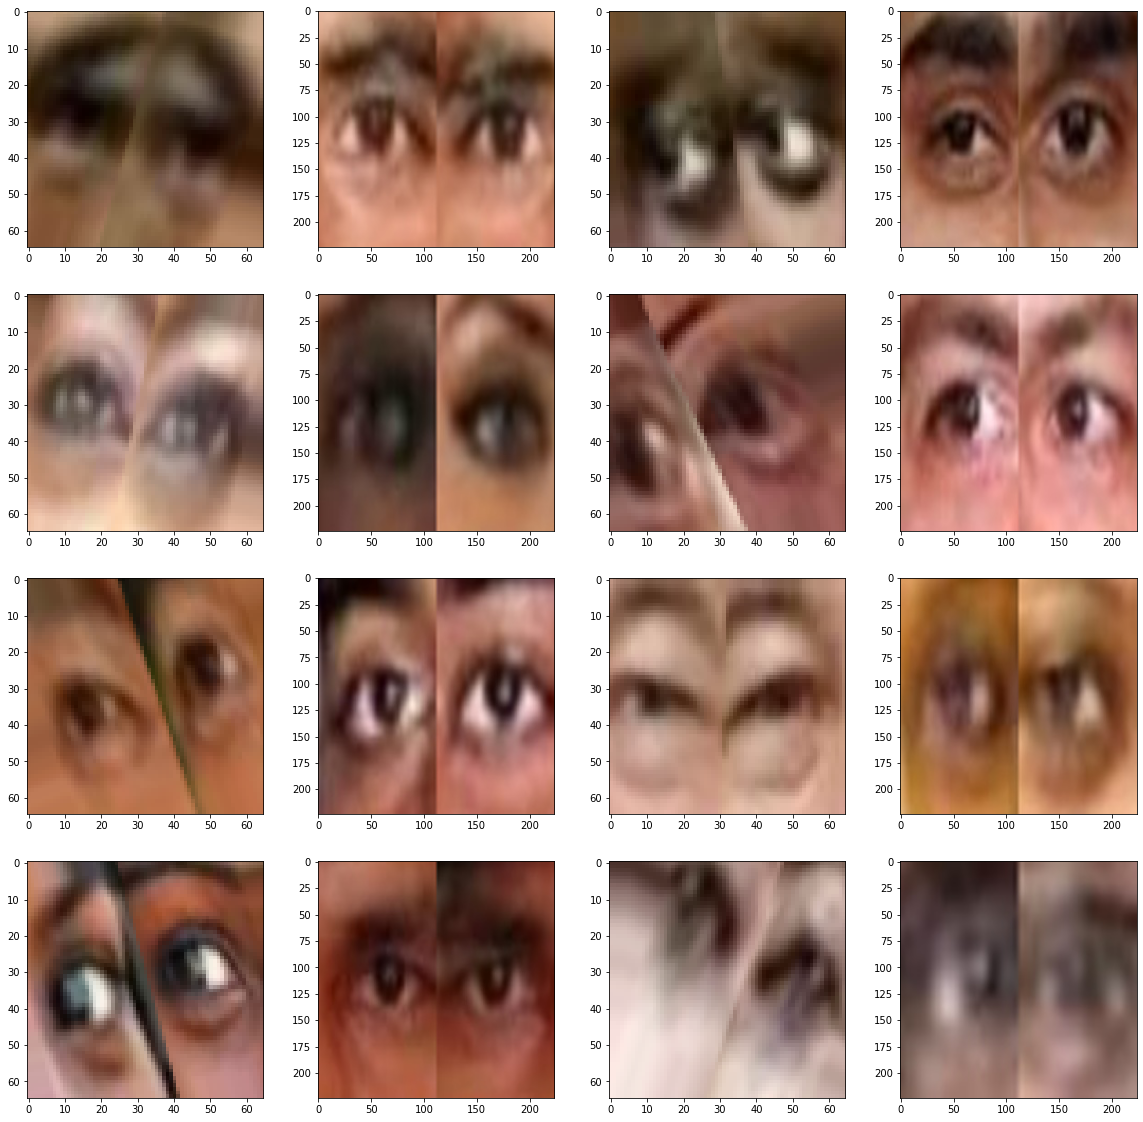

In [68]:
from skimage import io
import matplotlib.pyplot as plt
for i in range(3):
    x1,y1 = next(train_generator)
    y1_int = np.argmax(y1,axis=-1)
 
#Plot the batch images w.r.t. the dataset images.
plt.figure(figsize=(20,20))
idx=1
for i in range(8):
    plt.subplot(4,4,idx)
    idx+=1
    plt.imshow(x1[i].reshape(65,65,3))
    plt.subplot(4,4,idx)
    plt.imshow(io.imread(os.path.join(train_generator.directory,train_generator.filenames[(train_generator.batch_index-1)*32+i])))
    idx+=1

## Training Model From Scratch

In [23]:
from tensorflow.keras.applications import VGG16,VGG19,NASNetLarge,DenseNet201,ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import Sequence

# Transfer Learning

## Define pretrained Base

In [80]:
pretrained_base = VGG16(input_shape=(65,65,3), include_top=False, pooling='max',weights='imagenet')

In [53]:
pretrained_base.trainable = False

## Attach Head

In [ ]:
from tensorflow.keras import backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [81]:
model = Sequential([
    pretrained_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1)])

In [82]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dense_23 (Dense)            (None, 1)                 257       
                                                                 
Total params: 14,977,857
Trainable params: 14,977,857


## Compile the model

 metrics=[tf.keras.metrics.MeanSquaredError()]

In [60]:
model.compile(loss= "mse" , optimizer="sgd", metrics=["mse"] )

In [83]:
from tensorflow.keras import optimizers

optimizer = optimizers.Adam(clipvalue=0.5)
model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()])

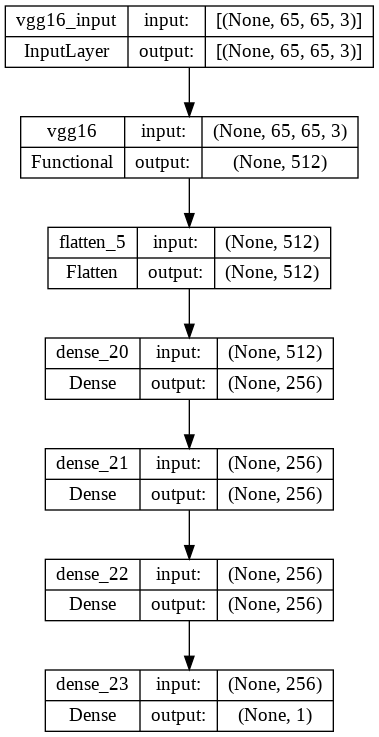

In [84]:
from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True)

## Defiing callbacks

## Arguments

* monitor: quantity to be monitored.
* factor: factor by which the learning rate will be reduced. new_lr = lr * factor.
* patience: number of epochs with no improvement after which learning rate will be reduced.
* verbose: int. 0: quiet, 1: update messages.
* mode: one of {'auto', 'min', 'max'}. In 'min' mode, the learning rate will be reduced when the quantity monitored has stopped decreasing; in 'max' mode it will be reduced when the quantity monitored has stopped increasing; in 'auto' mode, the direction is automatically inferred from the name of the monitored quantity.
* min_delta: threshold for measuring the new optimum, to only focus on significant changes.
* cooldown: number of epochs to wait before resuming normal operation after lr has been reduced.
* min_lr: lower bound on the learning rate.

In [85]:
folderpath = "/content/drive/MyDrive/Qualcom/Model/"
filepath = folderpath + "transfer_epoch:{epoch:02d}-val_loss:{val_loss:.2f}.hdf5"

In [86]:
cbs = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1,mode='auto', min_lr=1e-5, verbose=1),
      tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-6, patience=5, verbose=1, mode='auto'),
      ]

* https://keras.io/api/callbacks/model_checkpoint/
* https://keras.io/api/callbacks/reduce_lr_on_plateau/
* https://keras.io/api/callbacks/early_stopping/

## Train the Model

In [87]:
train_generator.n // train_generator.batch_size

687

In [88]:
valid_generator.n//valid_generator.batch_size

171

## Get Validation Data Labels to evaluate model data performance

In [105]:
import tqdm
y_true= []
for x,y in tqdm.tqdm(train.values):
  if x in valid_generator.filenames:
    y_true.append(y)


100%|██████████| 6872/6872 [00:00<00:00, 63820.79it/s]


In [89]:
batch_size = 8
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=5,
                    )

Epoch 1/5
687/687 [==============================] - 48s 67ms/step - loss: 2108.4358 - root_mean_squared_error: 45.9177 - val_loss: 390.4778 - val_root_mean_squared_error: 19.7605
Epoch 2/5
687/687 [==============================] - 44s 65ms/step - loss: 864.0353 - root_mean_squared_error: 29.3945 - val_loss: 376.0558 - val_root_mean_squared_error: 19.3922
Epoch 3/5
687/687 [==============================] - 44s 64ms/step - loss: 868.9067 - root_mean_squared_error: 29.4772 - val_loss: 7640.0850 - val_root_mean_squared_error: 87.4076
Epoch 4/5
687/687 [==============================] - 44s 64ms/step - loss: 710.8148 - root_mean_squared_error: 26.6611 - val_loss: 240.6299 - val_root_mean_squared_error: 15.5122
Epoch 5/5
687/687 [==============================] - 45s 65ms/step - loss: 849.7322 - root_mean_squared_error: 29.1502 - val_loss: 247.0029 - val_root_mean_squared_error: 15.7163


## Evaluate on the validation data

In [90]:
preds = model.predict(valid_generator)

172/172 [==============================] - 7s 38ms/step


In [91]:
predictions = np.ravel(preds)

In [92]:
predictions

array([32.785534, 37.050816, 10.733858, ..., 15.317434, 35.000034,
       12.306052], dtype=float32)

In [93]:
predictions = np.round(predictions)

In [94]:
predictions = predictions.astype(int)

## Trainng using more epochs and callbacks

In [95]:
batch_size = 8
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=50,
                    callbacks=cbs,
                    )

Epoch 1/50
687/687 [==============================] - 47s 68ms/step - loss: 775.4630 - root_mean_squared_error: 27.8471 - val_loss: 1265.6306 - val_root_mean_squared_error: 35.5757 - lr: 0.0010
Epoch 2/50
687/687 [==============================] - 45s 66ms/step - loss: 894.5890 - root_mean_squared_error: 29.9097 - val_loss: 235.6103 - val_root_mean_squared_error: 15.3496 - lr: 0.0010
Epoch 3/50
687/687 [==============================] - ETA: 0s - loss: 870.9793 - root_mean_squared_error: 29.5124
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
687/687 [==============================] - 45s 66ms/step - loss: 870.9793 - root_mean_squared_error: 29.5124 - val_loss: 1286.1747 - val_root_mean_squared_error: 35.8633 - lr: 0.0010
Epoch 4/50
687/687 [==============================] - ETA: 0s - loss: 620.7953 - root_mean_squared_error: 24.9158
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
687/687 [==============================] - 45s 65m

## Save the model

In [99]:
model.save("/content/drive/MyDrive/Qualcom/Model/AgeDensenet201.hdf5")

## Examine the loss and accuracy

In [97]:
import matplotlib.pyplot as plt

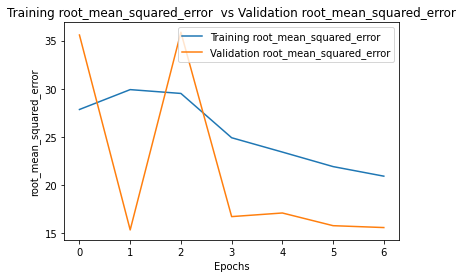

In [98]:

plt.plot(history.history['root_mean_squared_error'],label='Training root_mean_squared_error')
plt.plot(history.history['val_root_mean_squared_error'],label='Validation root_mean_squared_error')
plt.legend()
plt.title('Training root_mean_squared_error  vs Validation root_mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('root_mean_squared_error')
plt.show()

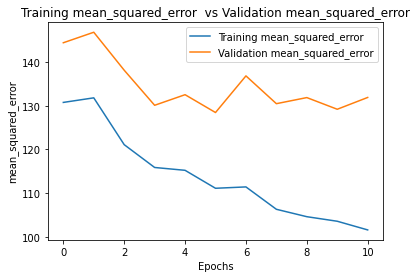

In [ ]:
plt.plot(history.history['mean_squared_error'],label='Training mean_squared_error')
plt.plot(history.history['val_mean_squared_error'],label='Validation mean_squared_error')
plt.legend()
plt.title('Training mean_squared_error  vs Validation mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('mean_squared_error')
plt.show()

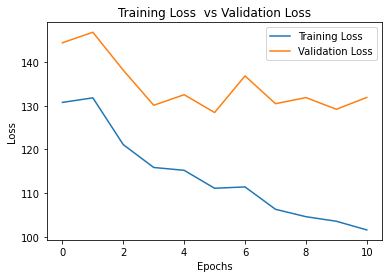

In [ ]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Training Loss  vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Evaluate the Model by loading the best model

In [100]:
chekpoint_filepath = "/content/drive/MyDrive/Qualcom/Model/AgeDensenet201.hdf5"

In [101]:
from tensorflow.keras.models import load_model
loaded_model = load_model(chekpoint_filepath)

##make inference on Validation data

In [106]:
preds = loaded_model.predict(valid_generator)

172/172 [==============================] - 7s 39ms/step


In [107]:
y_pred = np.ravel(preds)
y_pred = np.round(y_pred )

In [108]:
from sklearn.metrics import mean_squared_error,r2_score
print(np.sqrt(mean_squared_error(y_true,y_pred)))

18.877391112028867


In [109]:
print(r2_score(y_true,y_pred))

-0.46639309109217386


In [110]:
def regression_accuracy(y_meas, y_pred, max_error=5, error_type='relative'):
    '''Compares predicted & measured values, returning the percentage of predictions
       that are within a set error limit. This error limit can be an absolute value
       or a relative percentage'''

    # OPTION 1: Relative percentage
    if ( error_type == 'relative' ):
        mask = 100.0 * abs((y_pred - y_meas) / y_meas) < max_error

    # OPTION 2: Absolute value
    if ( error_type == 'absolute' ):
        mask = abs(y_pred - y_meas) < max_error

    accuracy = sum(mask) / len(mask)

    return accuracy

In [111]:
regression_accuracy(y_true, y_pred,20)

0.24163027656477437

## Inference on Test Data

In [102]:
preds = loaded_model.predict(test_generator)

1628/1628 [==============================] - 11s 7ms/step


In [ ]:
predictions = np.ravel(preds)

In [ ]:
predictions = np.round(predictions )

In [ ]:
predictions = predictions.astype(int)

In [ ]:
predictions

array([24, 39, 43, ..., 50, 21, 29])

In [ ]:
test

,filename,age
0,0.jpg,17
1,1.jpg,48
2,2.jpg,51
3,3.jpg,51
4,4.jpg,47
...,...,...
1623,1623.jpg,21
1624,1624.jpg,49
1625,1625.jpg,56
1626,1626.jpg,22


In [ ]:
y_val =test['age'].values

In [ ]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_val,predictions)))

11.683847183709869


In [ ]:
regression_accuracy(y_val, predictions)

0.128992628992629

In [ ]:
regression_accuracy(y_val, predictions,20)

0.4416461916461916

## Make inference on the test data

In [ ]:
test_data_predictions  = loaded_model.predict(test_generator)

In [ ]:
test_predictions = np.argmax(test_data_predictions,axis=1)

In [ ]:
file_names = test_generator.filenames

## Prepare Submission File

In [ ]:
import pandas as pd
df_submission = pd.DataFrame({"filename":file_names,"predictions":test_predictions})

In [ ]:
df_submission.head()

,filename,predictions
0,25_1_3_20170117152000516_resized.jpg,1
1,64_0_2_20170116193321184_resized.jpg,0
2,5_0_0_20170110220356210_resized.jpg,0
3,59_0_0_20170109012750162_resized.jpg,0
4,26_0_0_20170113210127277_resized.jpg,0


In [ ]:
train_generator.class_indices

{'0': 0, '1': 1}

In [ ]:
label_dict = {v:k for k,v in train_generator.class_indices.items()}
label_dict

{0: '0', 1: '1'}

In [ ]:
df_submission['predictions'] = df_submission['predictions'].map(label_dict)

In [ ]:
df_submission.head()

,filename,predictions
0,25_1_3_20170117152000516_resized.jpg,1
1,64_0_2_20170116193321184_resized.jpg,0
2,5_0_0_20170110220356210_resized.jpg,0
3,59_0_0_20170109012750162_resized.jpg,0
4,26_0_0_20170113210127277_resized.jpg,0
